#ICC World Cup 2023 Champion



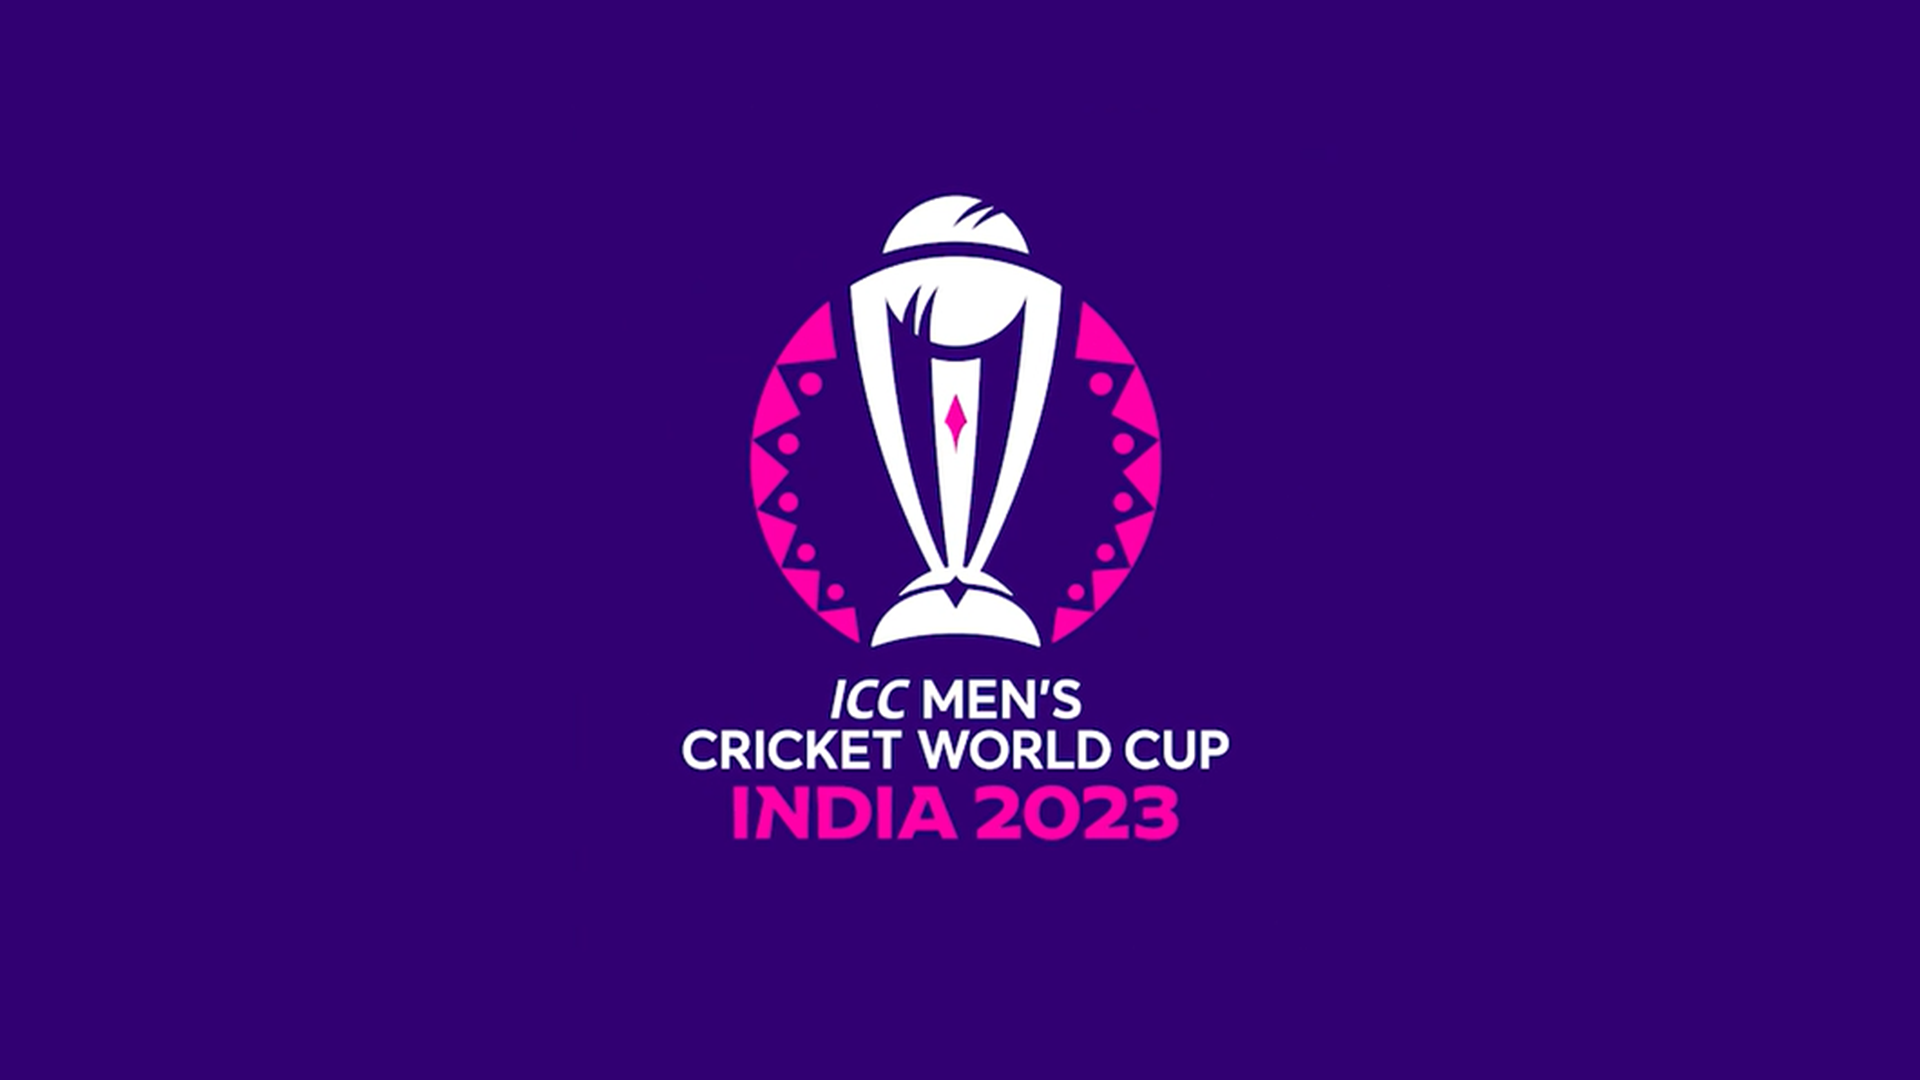

https://drive.google.com/file/d/1hACrzMbbi2LJTvdrMXNyGJ7FhdgZg-W8/view?usp=sharing



### Objective:
The main objective of predicting the ICC World Cup 2023 winner using machine learning is to leverage data-driven techniques to make accurate forecasts about which cricket team is most likely to emerge as the tournament champion, helping fans, analysts, and teams gain insights into performance and outcomes.

### 1. Data Collection
I have collected data from HowStat.com, which includes the results of ODI matches since the 2023 World Cup. While I acknowledge that the model's accuracy may not be exceptionally high, I believe it provides a reasonably good sense of the trends. I chose not to include matches prior to the 2023 World Cup because I consider recent results to be more influential, with older data carrying less weight. For the remaining data files, I sourced them from the Cricbuzz website.

In [ ]:
# install library to get the latest cricket data data
!pip install extract-wc-data

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
  Created wheel for chromedriver-binary: filename=chromedriver_binary-121.0.6115.2.0-py3-none-any.whl size=7919411 sha256=8487a27e35bdb716cbb6ee3362faf10bfe90cf8d6aefb03194d611e1b5b909fd
  Stored in directory: /root/.cache/pip/wheels/44/f1/37/c9f75198525a898b1d666b4333d1dabd8a82c6d0eacd9feb79
Successfully built chromedriver-binary
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.

In [ ]:
# import that library to get latest data
from ExtractWCData.get_latest_data import GetData

data = GetData()
df = data.get_data()

# convert the data into csv format and store the latest data
df.to_csv('latest_data.csv')

In [ ]:
# import the basic libraries for data prepocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the datasets

#Read data from "World_cup_2023.csv"
world_cup = pd.read_csv("World_cup_2023.csv")

#Read data from "results.csv"
results = pd.read_csv("results.csv")

#Now load th elatest data also
latest = pd.read_csv('latest_data.csv')

In [ ]:
world_cup

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101
5,South Africa,6,0,61.00,64,38,59.37,23,35.93,2,1,No,1910,101
6,Bangladesh,7,0,36.65,40,14,35.00,25,62.50,0,1,No,2451,98
7,Afghanistan,8,0,49.65,15,1,6.66,14,93.33,0,0,No,1361,91
8,Sri Lanka,9,1,45.74,80,38,47.50,39,48.75,1,2,Yes,2794,87
9,Netherlands,10,0,34.21,20,2,10.00,18,90.00,0,0,No,1044,37


In [ ]:
results

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium
...,...,...,...,...,...,...
717,06/07/2023,Netherlands,Scotland,Netherlands,won by 4 wickets,Queens Sports Club
718,07/07/2023,Sri Lanka,West Indies,Sri Lanka,won by 8 wickets,Harare Sports Club
719,08/07/2023,Bangladesh,Afghanistan,Afghanistan,won by 142 runs,Zahur Ahmed Chowdhury Stadium
720,09/07/2023,Netherlands,Sri Lanka,Sri Lanka,won by 128 runs,Harare Sports Club


In [ ]:
# print the shape of datasets
print(f'World_cup data shape : {world_cup.shape}')
print(f'Results data shape : {results.shape}')

World_cup data shape : (10, 14)
Results data shape : (722, 6)


In [ ]:
# concat old dataset which is results.csv and new dataset which is latest.csv
results = pd.concat([results, latest], axis=0)

#reset index
results = results.reset_index(drop=True)
results.tail(5)

,Date,Team_1,Team_2,Winner,Margin,Ground,Unnamed: 0
758,05/11/2023,India,South Africa,India,243 runs,"Eden Gardens, Kolkata",36.0
759,06/11/2023,Bangladesh,Sri Lanka,Bangladesh,3 wickets,"Arun Jaitley Stadium, Delhi",37.0
760,07/11/2023,Afghanistan,Australia,Australia,3 wickets,"Wankhede Stadium, Mumbai",38.0
761,08/11/2023,England,Netherlands,England,160 runs,"Maharashtra Cricket Association Stadium, Pune",39.0
762,09/11/2023,New Zealand,Sri Lanka,New Zealand,5 wickets,"M Chinnaswamy Stadium, Bengaluru, Bangalore",40.0


In [ ]:
results.shape

(763, 7)

In [ ]:
#column names of results.csv
results.columns

Index(['Date', 'Team_1', 'Team_2', 'Winner', 'Margin', 'Ground', 'Unnamed: 0'], dtype='object')

In [ ]:
results.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
results.head(4)

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village


## 2. Data Analysis and Visualization

### No. of Titles won by each team

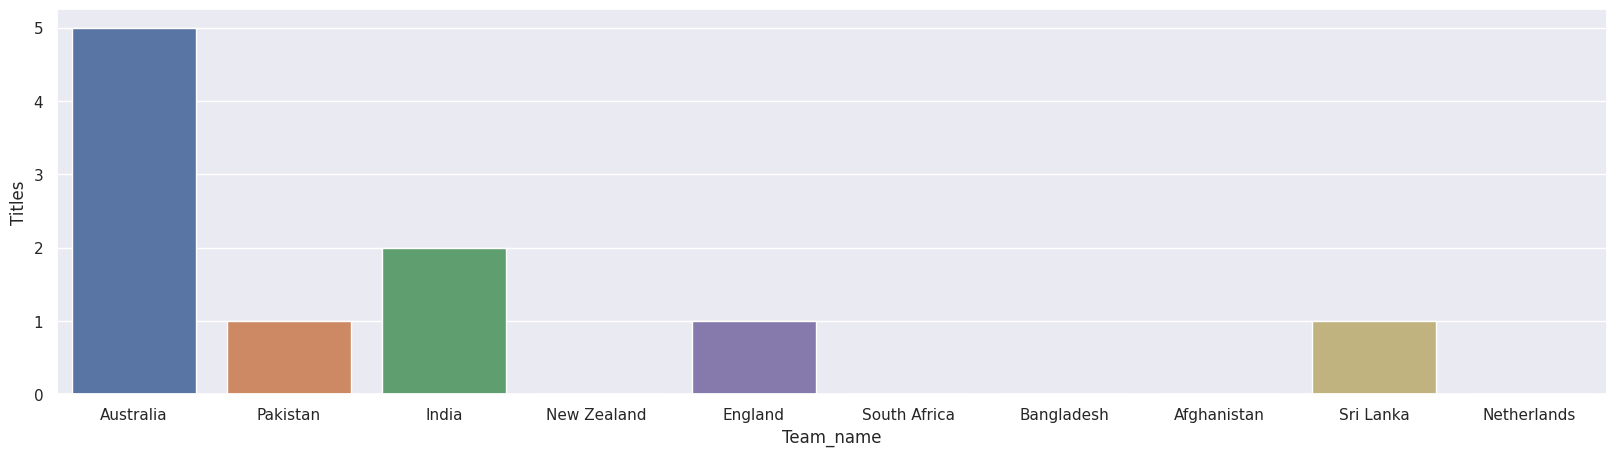

In [ ]:
# Set the figure size using sns.set
sns.set(rc={'figure.figsize': (20, 5)})

# Create a bar plot using sns.barplot to visualize team titles
sns.barplot(x='Team_name', y='Titles', data=world_cup)

# Display the plot
plt.show()


### Recent ICC ODI rating

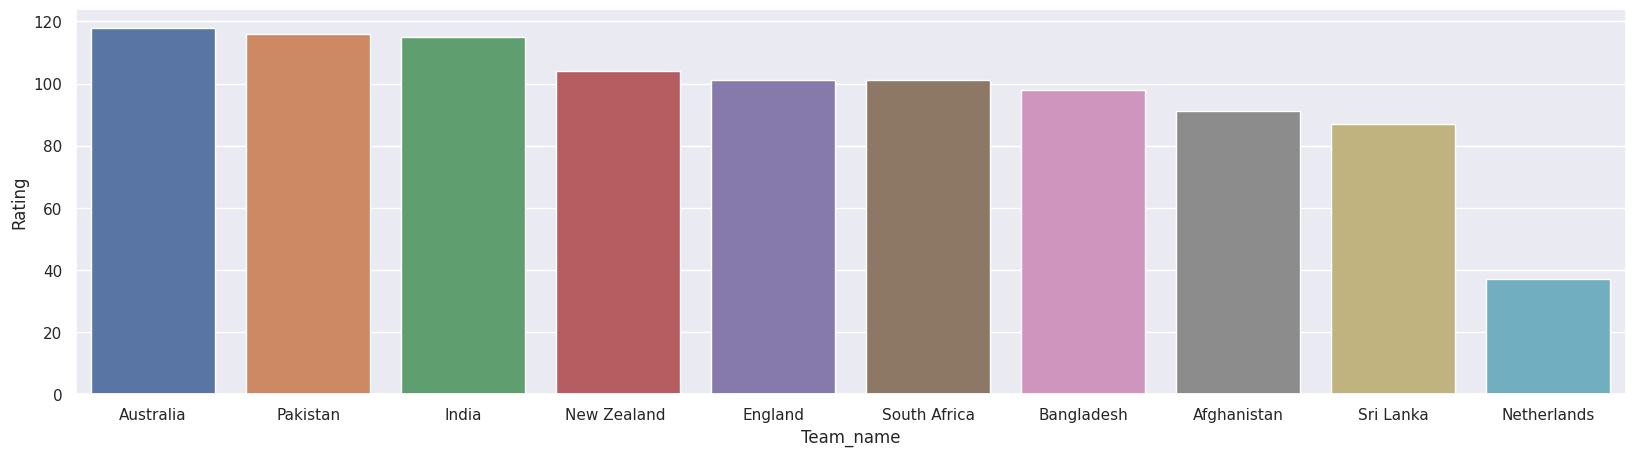

In [ ]:
# Set the figure size using sns.set
sns.set(rc={'figure.figsize': (20, 5)})

#Create a bar plot using seaborn to display recent ratings of teams
sns.barplot(x='Team_name', y='Rating', data=world_cup)

# Display the plot
plt.show()

### Stats of Indian team

In [ ]:
# Filter the 'results' Dataframe too indicate rows where India played either as Team_1 or ateam_2
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]

#Create a new Dataframe "india containing all rows from the filtered Datafame
India = df.iloc[:]

India.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
13,21/06/2015,Bangladesh,India,Bangladesh,won by 6 wickets,Shere Bangla National Stadium
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club


### Display Team India's wins against other teams using bar graph


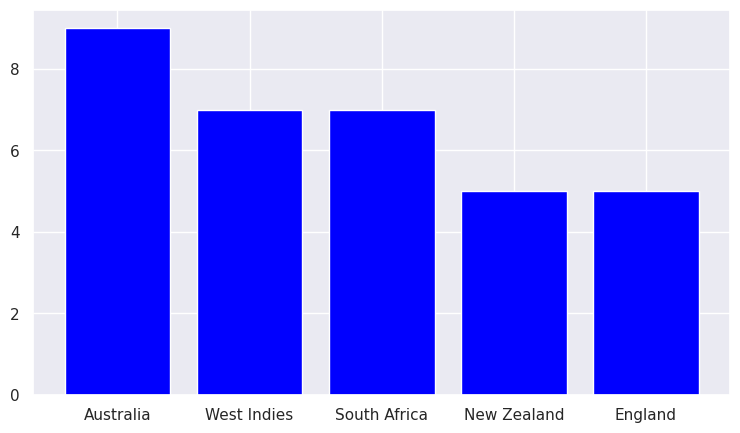

In [ ]:
#First Exclude India team
exclude='India'

#filter out the opponent to exclude from data
filtered_data = df[df['Team_2'] != exclude]

#plotting a bar chart to show the top 5 opponents faced by India
plt.figure(figsize=(9,5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color='blue')
plt.show()

## 3. Exploratory data analysis
drop the columns ['Date', 'Margin', 'Ground']

In [ ]:
results = results.drop(columns=['Date', 'Margin', 'Ground'], axis=1)
results.head(4)

,Team_1,Team_2,Winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
3,Ireland,England,No result


In [ ]:
#List of cricket teams participating in the world cup,
world_cup_teams = ['England', 'South Africa', 'West Indies', 'Pakistan', 'New Zealand',
                   'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India'] #From worl_cup['Team_name']

#Filtering matches involving only teams in the 'world_cup_teams' list
df_teams_1 = results[results['Team_1'].isin(world_cup_teams)] #Extract matches with 'Team_1'
df_teams_2 = results[results['Team_2'].isin(world_cup_teams)] #Extract matches with 'Team_2'
df_winners = results[results['Winner'].isin(world_cup_teams)]

#combine the filtered dataframes
df_teams = pd.concat((df_teams_1, df_teams_2, df_winners), axis=0)

df_teams.head()

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
29,South Africa,New Zealand,South Africa
35,England,Australia,England
53,Sri Lanka,West Indies,Sri Lanka


In [ ]:
# create another column ['Winning'] where it will have the winner team[if Team_A wins:1, else:2]
df_teams.loc[:, 'Winning'] = np.where(df_teams['Winner'] == df_teams['Team_1'], 1, 2)

df_teams.head()

,Team_1,Team_2,Winner,Winning
8,England,New Zealand,New Zealand,2
11,Bangladesh,India,Bangladesh,2
29,South Africa,New Zealand,South Africa,1
35,England,Australia,England,1
53,Sri Lanka,West Indies,Sri Lanka,1


In [ ]:
#drop the Winner column
df_teams.drop(columns=['Winner'],axis=1, inplace=True)
df_teams.head(4)

,Team_1,Team_2,Winning
8,England,New Zealand,2
11,Bangladesh,India,2
29,South Africa,New Zealand,1
35,England,Australia,1


### 4. Data Transformation


In [ ]:
# import the libraries for data transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#split the data into x and y
x = df_teams.drop(columns=['Winning'], axis=1)
y = df_teams['Winning']


#split the x and y into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# Apply OneHotEncoder on input columns
ohe_encoder = OneHotEncoder(handle_unknown='ignore')
x_train = ohe_encoder.fit_transform(x_train)
x_test = ohe_encoder.transform(x_test)

### 5. Model Training

In [ ]:
#let's apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

#prediction on x_test
pred = rf.predict(x_test)

#print score of both train and test
score=rf.score(x_train, y_train)
score_2 = rf.score(x_test, y_test)

print(f'train acc = {score}')
print(f'test acc = {score_2}')

train acc = 0.854149203688181
test acc = 0.8127090301003345


In [ ]:
#fit multiple algorithms to check the better model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('classifier', clf)
    ])

    # Fit the model
    pipeline.fit(x_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(x_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    print(f"{name}:")
    print(f"Accuracy: {acc:.4f}")
    print("------------------------------")

Random Forest:
Accuracy: 0.8094
------------------------------
Logistic Regression:
Accuracy: 0.7860
------------------------------
Decision Tree:
Accuracy: 0.8194
------------------------------
Support Vector Machine:
Accuracy: 0.8194
------------------------------


###6. Hyper-parameter Tuning

In [ ]:
# Using GridSearchCV for parameter tuning
from sklearn.model_selection import GridSearchCV

# Define the model and hyperparameter grid
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10,20,50,100,150],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Access the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'best_prams : {best_params}')
print(f'best_model : {best_model}')

best_prams : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
best_model : RandomForestClassifier(min_samples_split=10, n_estimators=150)


In [ ]:
#train the model using best model parameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_split=10, n_estimators=150)
rf.fit(x_train, y_train)

pred=rf.predict(x_test)

score=rf.score(x_train, y_train)
score_2 = rf.score(x_test, y_test)

print(f'train acc = {score}')
print(f'test acc = {score_2}')

train acc = 0.8507963118189439
test acc = 0.8160535117056856


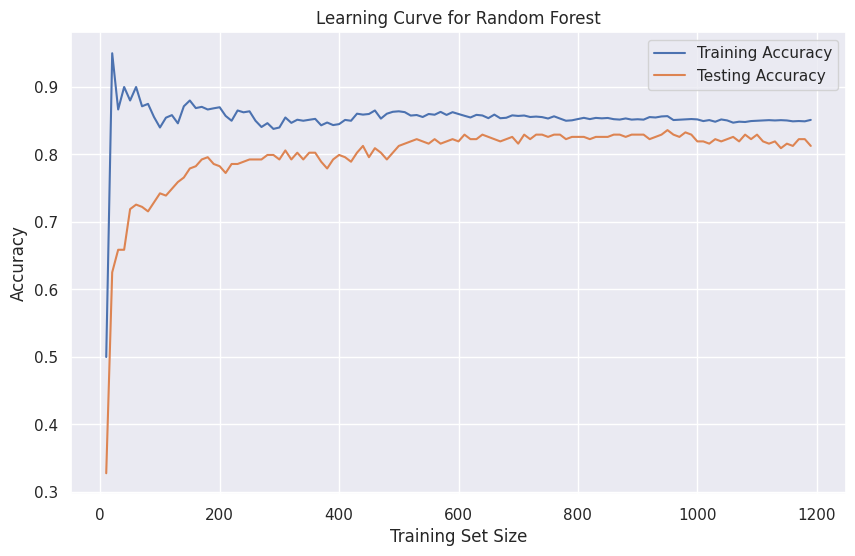

In [ ]:
# plot the graph of Model learning/training curve

# Lists to store training and testing accuracies
train_acc = []
test_acc = []

# Vary the size of the training set
sizes = np.arange(10, x_train.shape[0], step=10)  # Use x_train.shape[0] to get the number of rows

for size in sizes:

    rf = RandomForestClassifier(min_samples_split=10, n_estimators=150)

    # Train the model on a subset of the training data
    rf.fit(x_train[:size], y_train[:size])

    # Predictions on the training set
    y_train_pred = rf.predict(x_train[:size])
    train_acc.append(accuracy_score(y_train[:size], y_train_pred))

    # Predictions on the testing set
    y_test_pred = rf.predict(x_test)
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_acc, label='Training Accuracy')
plt.plot(sizes, test_acc, label='Testing Accuracy')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


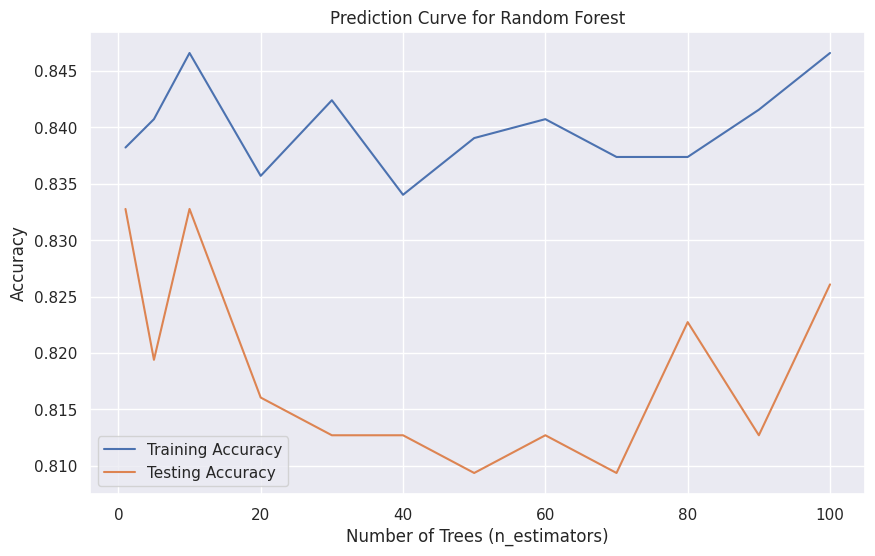

In [ ]:
#plot the graph of prediction curve

# Vary the number of trees in the Random Forest
n_estimators_values = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_acc = []
test_acc = []

for n_estimators in n_estimators_values:
    # Create a Random Forest classifier with varying number of trees
    rf = RandomForestClassifier(max_depth=20, min_samples_split=6, n_estimators=10)

    # Train the model
    rf.fit(x_train, y_train)

    # Predictions on the training set
    y_train_pred = rf.predict(x_train)
    train_acc.append(accuracy_score(y_train, y_train_pred))

    # Predictions on the testing set
    y_test_pred = rf.predict(x_test)
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Plot the prediction curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_acc, label='Training Accuracy')
plt.plot(n_estimators_values, test_acc, label='Testing Accuracy')
plt.title('Prediction Curve for Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This Hyper-parameter tuning is just for your understanding, how hyper-parameter tuning works.

Since we have less data, here hyer-parameter tuning is not useful. But it might be required in any other data sets you are working further


In [ ]:
# convert the y_test values into List format
print(y_test.tolist())

[2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2]


In [ ]:
#predict for x_test
y_test_pred = rf.predict(x_test)
print(y_test_pred)

[2 1 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 1 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2
 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2
 2 1 2 1 2 2 1 1 2 1 2 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 2 1 1 2 2 2 1 1 2 2
 1 2 2 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1
 1 2 2 2 1 2 1 2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2
 2 1 1 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 2 1 1 2 2 2
 2 2 2]


Here,
1 means Team_A is winner
2 means Team_B is winner

Accuracy:

train acc = 0.85

test acc = 0.81